<a href="https://colab.research.google.com/github/sol-commits/deep_learning/blob/main/learning_backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [12]:
import matplotlib.pyplot as plt

# 학습

In [3]:
# 활성화 함수
def sigmoid(x):
  return 1. / (1. + np.exp(-x))

In [6]:
# 순방향 연산 함수
def cal_output(W, x):
  v = np.matmul(W, x) # matrix multiplication
  y = sigmoid(v)
  return y

In [7]:
# 에러를 이용한 기울기를 계산하는 함수
# sigmoid 의 미분 = sigmoid * (1 - sigmoid)
def calc_error(d, y): # 참값, 예측값
  e = d - y
  delta = y*(1-y)*e
  return delta

In [4]:
# 그레디언트 디센트 계산
def delta_GC(W, X, D, alpha): # alpha : learning rate
  for k in range(4):
    x = X[k, :].T
    d = D[k]

    y = cal_output(W, x)
    delta = calc_error(d, y)

    # 가중치 업데이트
    dW = alpha * delta * x
    W = W + dW

  return W, delta

In [2]:
# and 연산 데이터
X = np.array([
    [0, 0, 1], # x1, x2, b
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])

D = ([[0], [0], [0], [1]]) # output

## 학습

In [8]:
W = 2*np.random.random((1, 3)) - 1
alpha = 0.9

hist_W = []
hist_loss = []

for epoch in range(1000): # 에포크
  W, delta = delta_GC(W, X, D, alpha)

  hist_W.append(W)
  hist_loss.append(delta)

  if epoch % 100 == 0:
    print(f'epoch : {epoch}, loss : {delta}')

epoch : 0, loss : [0.14620889]
epoch : 100, loss : [0.04521771]
epoch : 200, loss : [0.02392638]
epoch : 300, loss : [0.0159044]
epoch : 400, loss : [0.01180594]
epoch : 500, loss : [0.00934512]
epoch : 600, loss : [0.00771308]
epoch : 700, loss : [0.00655536]
epoch : 800, loss : [0.00569331]
epoch : 900, loss : [0.00502749]


## epoch 당 가중치의 변화

In [11]:
hist_W

[array([[-0.12595042,  0.16001165, -0.53363218]]),
 array([[-0.052223  ,  0.20889469, -0.62066653]]),
 array([[ 0.0224043 ,  0.26058594, -0.69859754]]),
 array([[ 0.09726947,  0.31418392, -0.76958829]]),
 array([[ 0.17172116,  0.36884598, -0.8354491 ]]),
 array([[ 0.24513871,  0.42380324, -0.89765996]]),
 array([[ 0.31696438,  0.4783843 , -0.95738718]]),
 array([[ 0.38673549,  0.53203836, -1.01550198]]),
 array([[ 0.45410661,  0.58434951, -1.07260799]]),
 array([[ 0.51885652,  0.63503754, -1.12908002]]),
 array([[ 0.58088027,  0.68394543, -1.18511146]]),
 array([[ 0.64017031,  0.73101758, -1.24076415]]),
 array([[ 0.69679269,  0.77627417, -1.29601457]]),
 array([[ 0.75086314,  0.81978633, -1.35079188]]),
 array([[ 0.80252645,  0.8616551 , -1.40500605]]),
 array([[ 0.85194062,  0.90199551, -1.45856654]]),
 array([[ 0.89926568,  0.94092544, -1.5113931 ]]),
 array([[ 0.94465656,  0.97855872, -1.56342093]]),
 array([[ 0.98825908,  1.01500127, -1.61460195]]),
 array([[ 1.030208  ,  1.050349

In [17]:
np.array(hist_W).shape, np.array(hist_W).reshape(-1, 3).shape

((1000, 1, 3), (1000, 3))

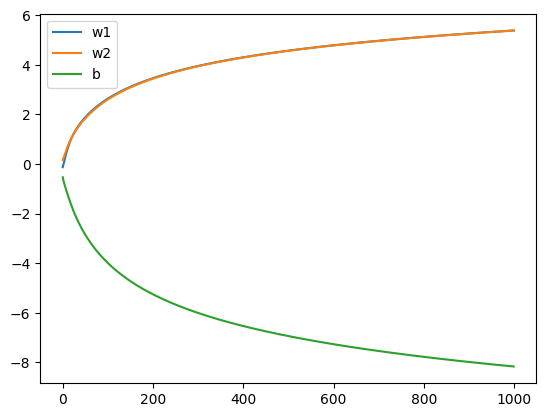

In [20]:
plt.plot(np.array(hist_W).reshape(-1, 3), label=['w1', 'w2', 'b'])
plt.legend()
plt.show()

## epoch 당 loss의 변화

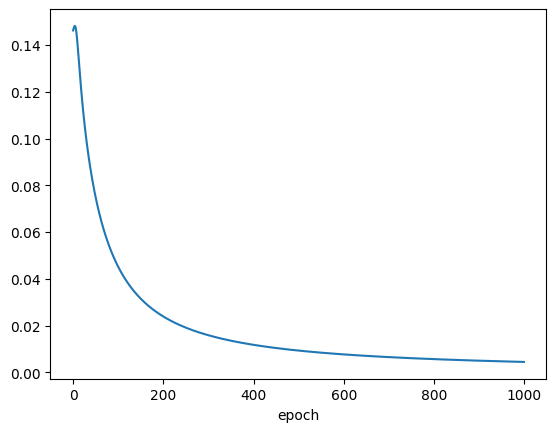

In [13]:
plt.plot(hist_loss)
plt.xlabel('epoch')
plt.show()

## 추론

In [22]:
N = 4
for k in range(N):
  x = X[k, :].T
  y = cal_output(W, x)

  print(y)

[0.0002851]
[0.05840067]
[0.05859961]
[0.93121438]


# XOR

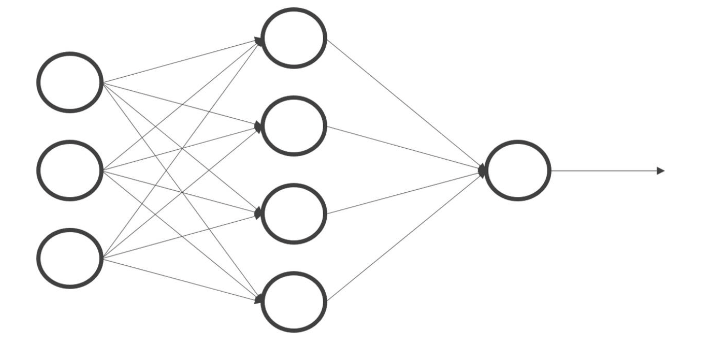

In [40]:
# 정방향 추론기
def calc_output(W1, W2, x):
  v1 = np.matmul(W1, x)
  y1 = sigmoid(v1)
  v = np.matmul(W2, y1)
  y = sigmoid(v)

  return y, y1

In [41]:
# 출력층 델타 함수
def calc_delta(d, y):
  e = d - y
  delta = y*(1-y)*e
  return delta

In [42]:
# 은닉층 델타 함수
def calc_delta1(W2, delta, y1):
  e1 = np.matmul(W2.T, delta)
  delta1 = y1*(1-y1)*e1
  return delta1

In [49]:
# 역전파 코드
def backprop_XOR(W1, W2, X, D, alpha):
  for k in range(4):
    x = X[k, :].T
    d = D[k]

    y, y1 = calc_output(W1, W2, x)
    delta = calc_delta(d, y)
    delta1 = calc_delta1(W2, delta, y1)

    dW1 = alpha*delta1.reshape(-1, 1) * x.reshape(1, 3)
    W1 = W1 + dW1

    dW2 = alpha*delta*y1
    W2 = W2 + dW2

  return W1, W2

In [44]:
# xor 연산 데이터
X = np.array([
    [0, 0, 1], # x1, x2, b
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])

D = ([[0], [1], [1], [0]]) # output

W1 = 2*np.random.random((4, 3)) - 1
W2 = 2*np.random.random((1, 4)) - 1

## 학습

In [50]:
alpha = 0.9

for epoch in range(10000):
  W1, W2 = backprop_XOR(W1, W2, X, D, alpha)

In [51]:
# 학습 완료된 weight 로 모델
N = 4
for k in range(4):
  x = X[k, :].T
  v1 = np.matmul(W1, x)
  y1 = sigmoid(v1)
  v = np.matmul(W2, y1)
  y = sigmoid(v)

  print(y)

[0.00958373]
[0.99069515]
[0.99063889]
[0.00541671]
